### 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing warnings to turn off future warnings
import warnings
warnings.simplefilter(action='ignore')


In [2]:
#reading in the data
goodreads_sample = pd.read_csv('good_reads_final.csv')
goodreads_sample.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105


### 1. Preprocess Data

#### 1.1 Check for Duplicate bookid

In [3]:
#find duplicates
len(goodreads_sample['book_id'].unique())

16830

In [4]:
dup_item = goodreads_sample[goodreads_sample['book_id'].duplicated()]
dup_item.shape

(6061, 20)

In [5]:
#drop duplicates based on 'book_title'
goodreads_sample = goodreads_sample.drop_duplicates(subset=['book_id'])

In [6]:
goodreads_sample.shape

(16830, 20)

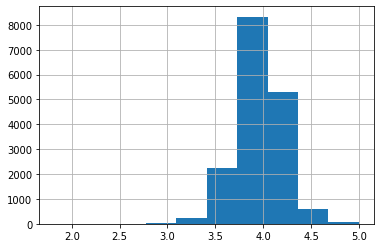

In [7]:
goodreads_sample['author_average_rating'].hist()
plt.show()

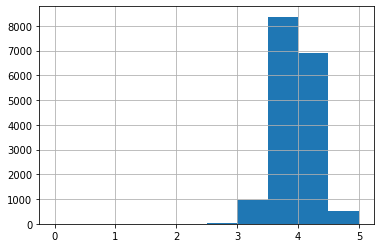

In [8]:
goodreads_sample['book_average_rating'].hist()
plt.show()

#### 1.1 Drop Columns

In [9]:
#filter out specific columns
data = goodreads_sample.loc[:,['author_genres','author_name','book_title', 'genre_1', 'genre_2']]

In [10]:
#checking out the file
data.head()

,author_genres,author_name,book_title,genre_1,genre_2
0,"historical-fiction,",Victoria Thompson\n,\n Murder on St. Mark's Place\n,Mystery,Historical
1,"literature-fiction,mystery-thrillers,",Stieg Larsson\n,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery
2,"romance,",Mimi Jean Pamfiloff\n,\n Tailored for Trouble\n,Romance,Contemporary
3,"fiction,memoir,",José Donoso\n,\n The Obscene Bird of Night\n,Fiction,Magical Realism
4,"young-adult,fantasy,",Patricia C. Wrede\n,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult


In [11]:
data.shape

(16830, 5)

In [12]:
#find missing values
data.isnull().sum()

author_genres    0
author_name      0
book_title       0
genre_1          0
genre_2          0
dtype: int64

In [13]:
#we have '-' in author_genres, lets replace it with whitespace 
#so that they can be considered as different strings
data['author_genres'] = data['author_genres'].str.replace(',', ' ')
data['author_genres'] = data['author_genres'].str.replace('-', ' ')

#similarly we replace '\n' in author_name  
data['author_name'] = data['author_name'].str.replace('\n', ' ')

#similarly we replace '\n' and ':' in book_title  
data['book_title'] = data['book_title'].str.replace('\n', ' ')
data['book_title'] = data['book_title'].str.replace(':', ' ')
data['book_title'] = data['book_title'].str.replace(',', ' ')
data['book_title'] = data['book_title'].str.replace('/', ' ')
data['book_title'] = data['book_title'].str.replace('-', ' ')

In [14]:
#remove leading and trailing spaces
data['author_genres'] = data['author_genres'].str.strip()
data['author_name'] = data['author_name'].str.strip()
data['book_title'] = data['book_title'].str.strip()
data['genre_1'] = data['genre_1'].str.strip()
data['genre_2'] = data['genre_2'].str.strip()

In [15]:
# Now converting all columns values to lowercase for searching simplicity.
data['author_genres'] = data['author_genres'].str.lower()
data['author_name'] = data['author_name'].str.lower()
data['book_title'] = data['book_title'].str.lower()
data['genre_1'] = data['genre_1'].str.lower()
data['genre_2'] = data['genre_2'].str.lower()
data.head()

,author_genres,author_name,book_title,genre_1,genre_2
0,historical fiction,victoria thompson,murder on st. mark's place,mystery,historical
1,literature fiction mystery thrillers,stieg larsson,the girl with the dragon tattoo,fiction,mystery
2,romance,mimi jean pamfiloff,tailored for trouble,romance,contemporary
3,fiction memoir,josé donoso,the obscene bird of night,fiction,magical realism
4,young adult fantasy,patricia c. wrede,sorcery & cecelia or the enchanted chocolate pot,fantasy,young adult


In [16]:
#save processed data for later access
data.to_csv('data.csv',index=False)